In [22]:

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.

# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [34]:

# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = pd.read_csv("../dataset/pima-indians-diabetes.csv", header=None)
data_value=Data_set.values

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.

print(data_value.shape)
X = data_value[:, 0:8]
Y = data_value[:, 8:9]

#print(X[0][7])
#print(Y)


(768, 9)


In [41]:

# 전체 데이터에서 학습 데이터와 테스트 데이터(0.2)로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)

print(type(Y_train))
print(type(Y_train.flatten().astype('int8')))
print(Y_train.shape)
print(Y_train.flatten().astype('int8').shape)
X_samp, y_samp = RandomOverSampler(sampling_strategy=0.9).fit_resample(X_train, Y_train)
X_under_samp, y_under_samp =RandomUnderSampler(sampling_strategy=0.9).fit_resample(X_train, Y_train)
print("train class bin : " , np.bincount(Y_train.flatten().astype('int8')))
print("train OverSampler class bin : " , np.bincount(y_samp.flatten().astype('int8')))
print("train UnderSampler class bin : " , np.bincount(y_under_samp.flatten().astype('int8')))
print("val class bin : " , np.bincount(Y_valid.flatten().astype('int8')))
print("test class bin : " , np.bincount(Y_test.flatten().astype('int8')))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(491, 1)
(491,)
train class bin :  [327 164]
train OverSampler class bin :  [327 294]
train UnderSampler class bin :  [182 164]
val class bin :  [80 43]
test class bin :  [93 61]


In [42]:

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(8, ))
x = tf.keras.layers.Dense(20, activation='sigmoid')(input_Layer)
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [49]:

# 딥러닝을 실행합니다.
loss=tf.keras.losses.binary_crossentropy
optimizer =tf.keras.optimizers.SGD(learning_rate=0.009)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

history=model.fit(X_samp, y_samp, epochs=1000, batch_size=100, validation_data=(X_valid, Y_valid))


print(history.history.keys())


Epoch 1/1000
7/7 [==============================] - 1s 29ms/step - loss: 0.5703 - binary_accuracy: 0.6989 - val_loss: 0.6370 - val_binary_accuracy: 0.6585
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.5675 - binary_accuracy: 0.7037 - val_loss: 0.6530 - val_binary_accuracy: 0.6341
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.5604 - binary_accuracy: 0.7101 - val_loss: 0.6303 - val_binary_accuracy: 0.6504
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.5566 - binary_accuracy: 0.7182 - val_loss: 0.6188 - val_binary_accuracy: 0.6585
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.5553 - binary_accuracy: 0.7214 - val_loss: 0.6354 - val_binary_accuracy: 0.6341
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.5509 - binary_accuracy: 0.7198 - val_loss: 0.6337 - val_binary_accuracy: 0.6341
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.

-----
5/5 [==============================] - 0s 3ms/step - loss: 0.6356 - binary_accuracy: 0.6558
[0.6356422305107117, 0.6558441519737244]
5/5 [==============================] - 0s 4ms/step - loss: 0.6356 - binary_accuracy: 0.6558

 Accuracy: 0.6558


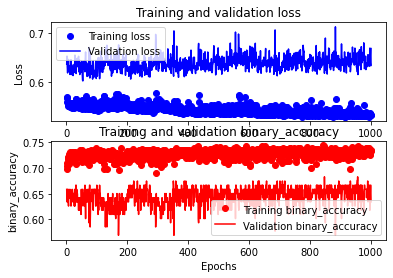

In [50]:

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
rmse = history.history['binary_accuracy']
val_rmse = history.history['val_binary_accuracy']
epochs = range(1, len(rmse) + 1)
### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training binary_accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation binary_accuracy')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()

# 결과를 출력합니다.
print("-----")
print(model.evaluate(X_test, Y_test))
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

plt.show()